Task_3_TechAI (Rihaan Shaikh SAP-60017240190 AIML A1 A056) 

Importing all the important libraries 
panda for dataframe
numpy for handling
matplotlib, seaborn for graphs and visualisation 
scikitlearn ML models and Evaluation of model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

Dataset-Loading and its structure

Dataset shape: (731, 16)


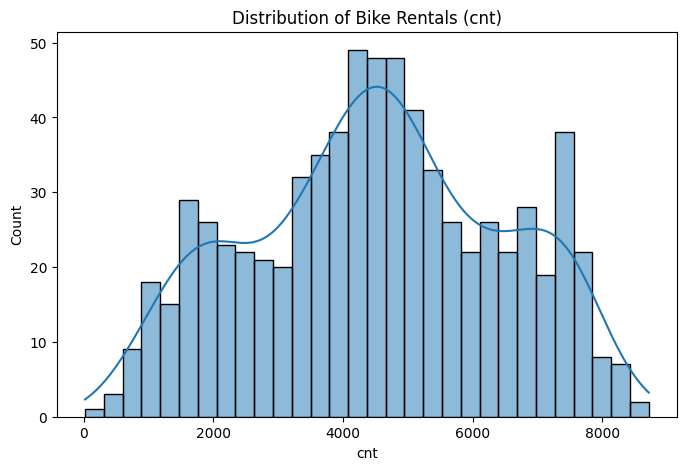

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [2]:
df =pd.read_csv('day - day.csv')
print("Dataset shape:", df.shape)

plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals (cnt)")
plt.show()


print(df.head())

print(df.info())

print(df.describe())

Encoding variables (like season,weather, weekday etc) using One-Hot encoding
ignoring useless columns that might leak info

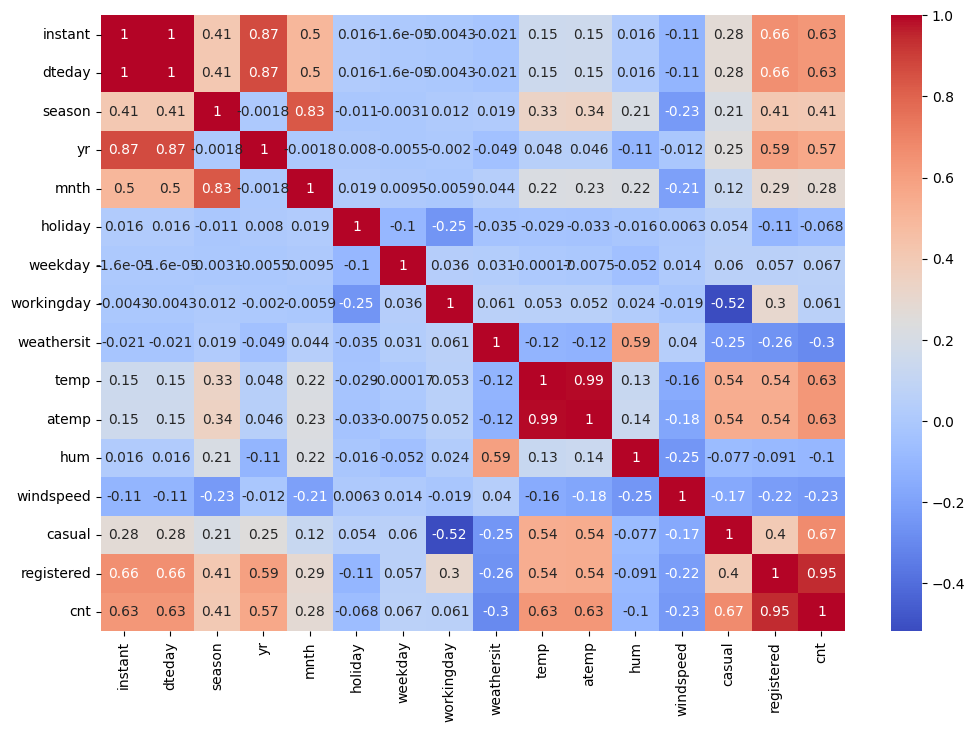

In [3]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
categorical_cols = ['season', 'mnth', 'weekday', 'weathersit']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_clean = df_encoded.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Splitting data into 80% (as data) and 20% (for testing)

In [4]:

X = df_clean.drop('cnt', axis=1)  
y = df_clean['cnt']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

Training models (Linear Regression, DecisionTree,RandomForest)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

forest_reg = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_
y_pred_forest = best_forest.predict(X_test)

Evaluation Metrics (MAE, MSE, R²)

In [6]:
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")
    return mae, mse, r2

evaluate(y_test, y_pred_lin, "Linear Regression")
evaluate(y_test, y_pred_tree, "Decision Tree")
evaluate(y_test, y_pred_forest, "Random Forest")

cv_scores = cross_val_score(best_forest, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Mean: {cv_scores.mean():.2f}")

Linear Regression - MAE: 583.02, MSE: 634351.36, R²: 0.84
Decision Tree - MAE: 649.33, MSE: 849105.49, R²: 0.79
Random Forest - MAE: 476.98, MSE: 531008.05, R²: 0.87
Cross-Validation R² Mean: 0.21


## Conclusion
- Linear Regression: R² ≈ 0.84  
- Decision Tree: R² ≈ 0.79  
- Random Forest: R² ≈ 0.87 (best model)

Random Forest gave the best predictions for bike rentals.  
Future improvements could include feature engineering (like holidays, weekend indicators), and trying advanced models such as Gradient Boosting.
